## Лабораторная работа 1. Устройство изображения

### Патракова Екатерина, РИМ-181226

In [4]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float

In [5]:
img = imread('1.png')

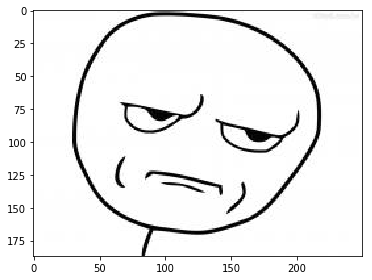

In [5]:
imshow(img)

Количество столбцов

In [6]:
img.shape[1]

250

## Изменение цвета пикселя изображения

In [7]:
r = (img.shape[0])//2
c = (img.shape[1])//2
img[r,c]=[102,255,10]

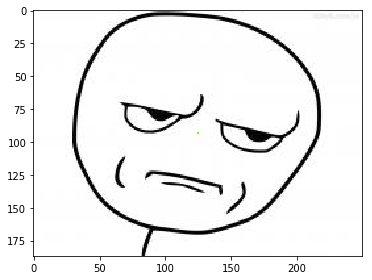

In [8]:
imshow(img)

## Изменение цвета прямоугольника

In [9]:
r1 = r - 10
r2 = r + 10
c1 = c - 10
c2 = c + 10

In [11]:
img[r1:r2,c1:c2]=[255,102,106]

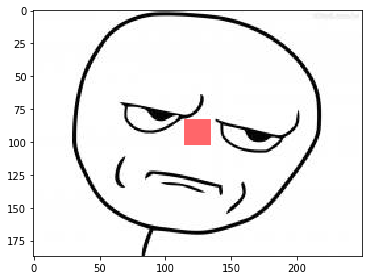

In [12]:
imshow(img)

## Поменять местами каналы изображения

In [15]:
from numpy import dstack

In [65]:
img = imread('1.png')
img[:,:, 0]+=100

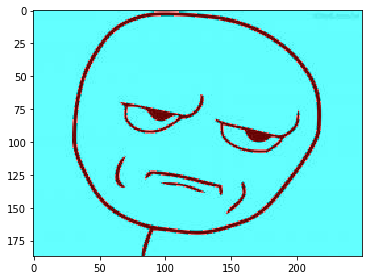

In [66]:
imshow(img)

In [67]:
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

rn = 255 - r
gn = 255 - g
bn = 255 - b

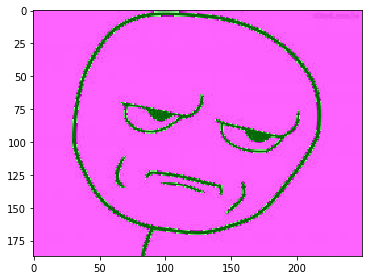

In [68]:
imshow(dstack([g,r,b]))

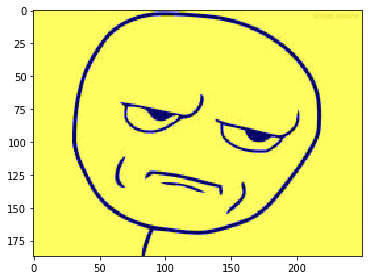

In [69]:
imshow(dstack([b,g,r]))

## Вычисление негатива изображения

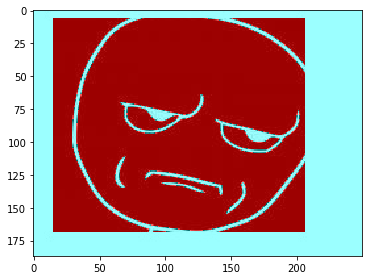

In [60]:
imshow(dstack([rn,gn,bn]))

## Определение рамки изображения

In [11]:
import numpy as np
img = imread('2.jpg')

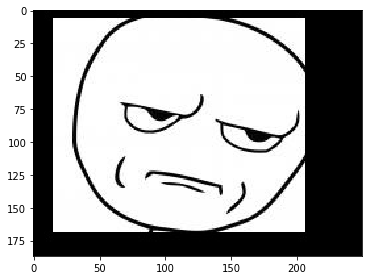

In [12]:
imshow(img)

In [23]:
c = img[0,0] # border color

row = img.shape[0] - 1
col = img.shape[1] - 1

xs = col//2
ys = row//2

x1, x2, x3, x4 =  0, 0, 0, 0

for i in range(col):
    if all(c!= img[xs, i]):
        break
    x1 += 1
    
for i in range(row):
    if all(c!= img[i, ys]):
        break
    x2 += 1
    
for i in range(row):
    if all(c!= img[xs, col - i]):
        break
    x3 += 1
    
for i in range(col):
    if all(c!= img[row - i, ys]):
        break
    x4 += 1
    
print(x1, x2, x3, x4)

15 1 42 11


## Сопоставление фотографий Прокудина-Горского

In [24]:
import math

In [31]:
from numpy import roll

def cut_image(img,cut):
    x_cut=math.floor(img.shape[0]*cut)
    y_cut=math.floor(img.shape[1]*cut)
    
    img=img[x_cut:-x_cut, y_cut:-y_cut]
    return img

def rolling(img, img_g):
    max_similar = 0
    for i in range(-15, 15, 1):
        newiimg = roll(img, i, 1)
        for j in range(-15, 15, 1):
            newjimg = roll(newiimg, j, 0)
            similar = (newjimg * img_g).sum()
            if (similar >= max_similar):
                max_similar = similar
                ixd = i
                jyd = j
    
    return max_similar, ixd, jyd

def shift(img, ixd, jyd):
    img = roll(img, (ixd, jyd), (1, 0))
    return img

def treatment(img, g_img):
    max_similar, ixd, jyd = rolling(img, g_img)
    img = shift(img, ixd, jyd)
    return img

def get_colout_img(img):
    img=img_as_float(img)
    size=math.floor(img.shape[0]/3)

    b = cut_image(img[:size], 0.05)
    g = cut_image(img[size:size*2], 0.05)
    r = cut_image(img[size*2:size*3], 0.05)

    b = treatment(b, g)
    r = treatment(r, g)
    img_out = np.dstack([r, g, b])
    
    return img_out

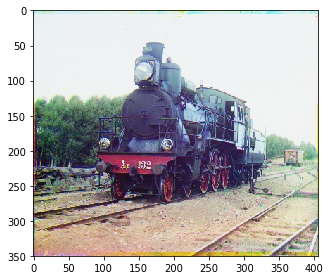

In [32]:
img = imread('03.png')
imshow(get_colout_img(img))

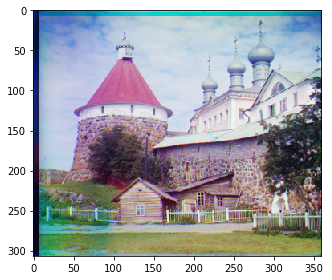

In [33]:
img = imread('01.png')
imshow(get_colout_img(img))

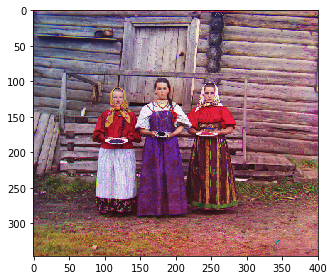

In [35]:
img = imread('04.png')
imshow(get_colout_img(img))

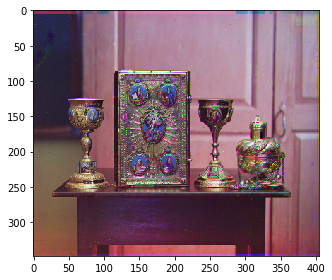

In [36]:
img = imread('05.png')
imshow(get_colout_img(img))

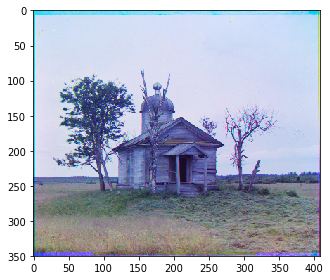

In [37]:
img = imread('06.png')
imshow(get_colout_img(img))

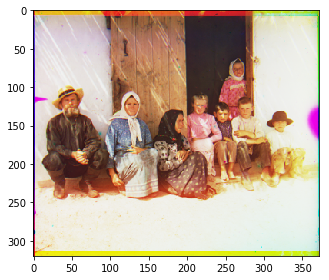

In [38]:
img = imread('07.png')
imshow(get_colout_img(img))

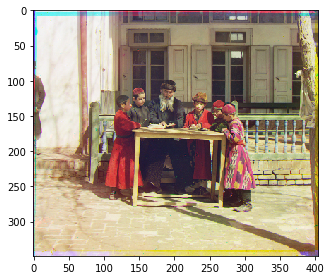

In [39]:
img = imread('08.png')
imshow(get_colout_img(img))